# Tugas

* Gunakan data dari https://www.kaggle.com/ozlerhakan/spam-or-not-spam-dataset.  

* Gunakan 500 data pertama ya merupakan NON SPAM dan 500 data pertama yang merupakan SPAM.

* Preprocess data, gunakan lemmatization dan DTM-idf (TF-IDF) sebagai bagian dari Preprocessing.  

* Tampilkan words frequency, wordcloud dan sentences length dari SPAM vs NOT SPAM.  

* Gunakan machine learning (misal:Logistic Regrssion) untuk memprediksi apakah suatu email merupakan email SPAM atau NOT SPAM.



In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
from string import punctuation
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('data/spam_or_not_spam.csv')
df.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [3]:
# dataframe kosong
df_new = pd.DataFrame(columns=['email','label'])
df_new

,email,label


In [4]:
# Not-spam
not_spam = df.loc[df['label']==0][:500]
not_spam.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [5]:
# Spam
spam = df.loc[df['label']==1][:100]
spam.head(3)

,email,label
2500,save up to NUMBER on life insurance why spend...,1
2501,NUMBER fight the risk of cancer URL NUMBER sli...,1
2502,NUMBER fight the risk of cancer URL NUMBER sli...,1


In [6]:
df_new = df_new.append(not_spam, ignore_index=True)
df_new.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [7]:
df_new = df_new.append(spam, ignore_index=True)
df_new.head(3)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0


In [8]:
df_new.shape

(600, 2)

In [9]:
df_new['label'].dtype

dtype('O')

# Preprocessing

## Prep 1-6

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

In [10]:
# converting to lower case
df_new['emailprep1'] = df_new['email'].str.lower()
df_new

,email,label,emailprep1
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date wed number aug number number number numb...
1,martin a posted tassos papadopoulos the greek ...,0,martin a posted tassos papadopoulos the greek ...
2,man threatens explosion in moscow thursday aug...,0,man threatens explosion in moscow thursday aug...
3,klez the virus that won t die already the most...,0,klez the virus that won t die already the most...
4,in adding cream to spaghetti carbonara which ...,0,in adding cream to spaghetti carbonara which ...
...,...,...,...
595,vc computers ltd ireland hosting from an irish...,1,vc computers ltd ireland hosting from an irish...
596,guaranteed to increase lift and firm your bre...,1,guaranteed to increase lift and firm your bre...
597,NUMBER join the web s hottest fastest growing ...,1,number join the web s hottest fastest growing ...
598,guaranteed to increase lift and firm your bre...,1,guaranteed to increase lift and firm your bre...


In [11]:
# contraction
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

df_new['emailprep2']=df_new['emailprep1'].apply(main_contraction)

In [12]:
# remove number or convert number to text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output 
df_new['emailprep3'] = df_new['emailprep2'].apply(remove_numbers)

In [13]:
# remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

df_new['emailprep4'] = df_new['emailprep3'].apply(remove_punct)

In [14]:
# remove white space
def to_strip(text):
    return " ".join(text.split())
df_new['emailprep5'] = df_new['emailprep4'].apply(to_strip)

In [15]:
# remove stopword
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

df_new['emailprep6'] = df_new['emailprep5'].apply(remove_stopwords)

In [16]:
pd.options.display.max_colwidth = None

In [17]:
df_new

,email,label,emailprep1,emailprep2,emailprep3,emailprep4,emailprep5,emailprep6
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER NUMBER NUMBER ict NUMBER and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers URL URL,0,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously the version of nmh i m using is delta pick version pick nmh number number number compiled on url at sun mar number number number number ict number and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers url url,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously

## Prep Lemmatization

In [18]:
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62812\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
df_new['email_lemmatize'] = df_new['emailprep6'].apply(lemmatize)
df_new

,email,label,emailprep1,emailprep2,emailprep3,emailprep4,emailprep5,emailprep6,email_lemmatize
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER NUMBER NUMBER ict NUMBER and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers URL URL,0,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously the version of nmh i m using is delta pick version pick nmh number number number compiled on url at sun mar number number number number ict number and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers url url,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit come

# Text Exploration

### 1. Word Freq


In [20]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [21]:
df_kamus = kamus(df_new['email_lemmatize'])

<AxesSubplot:ylabel='kata'>

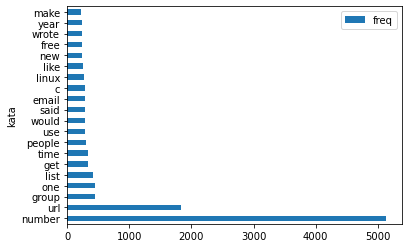

In [22]:
df_kamus[:20].plot(kind='barh')

### 2. Word Cloud


In [23]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [24]:
word_cloud = WordCloud().generate(str(df_new['email_lemmatize']))

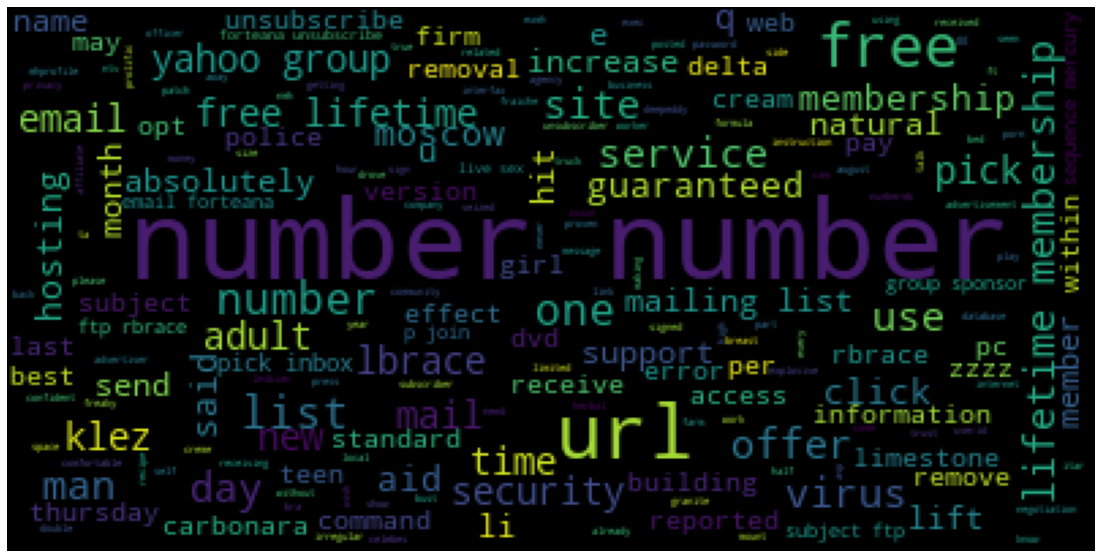

In [25]:
plot_cloud(word_cloud)

### 3. Length of Sentence

In [26]:
df_new['length']=df_new['email'].apply(len)
df_new

,email,label,emailprep1,emailprep2,emailprep3,emailprep4,emailprep5,emailprep6,email_lemmatize,length
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER NUMBER NUMBER ict NUMBER and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers URL URL,0,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number hit comes from obviously the version of nmh i m using is delta pick version pick nmh number number number compiled on url at sun mar number number number number ict number and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers url url,date wed number aug number number number number number from chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit that s where the number h

C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


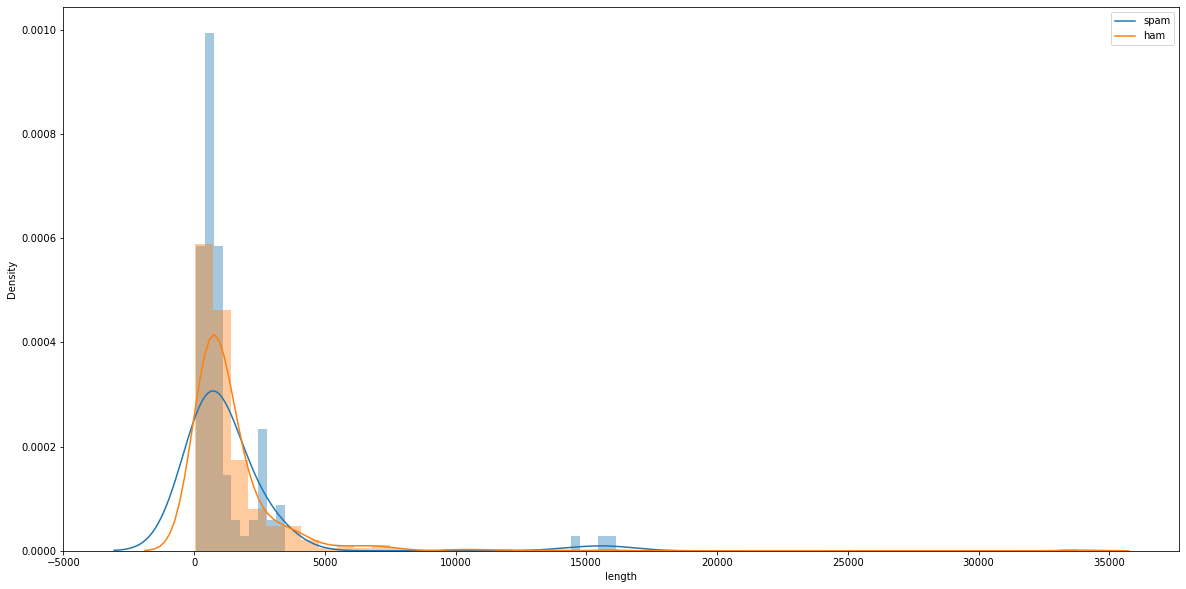

In [27]:
df_email_spam = df_new[df_new['label']==1]
df_email_ham = df_new[df_new['label']==0]

plt.figure(figsize=(20,10))
sns.distplot(df_email_spam['length'])
sns.distplot(df_email_ham['length'])

plt.legend(['spam','ham'])
plt.show()

# Document Term Matrix (DTM)

## TF-IDF (N-grams)


In [28]:
vect = TfidfVectorizer()
vect.fit(df_new['email_lemmatize'])

TfidfVectorizer()

In [29]:
dtm_tf_idf = vect.transform(df_new['email_lemmatize'])

In [30]:
dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), columns=vect.get_feature_names())
dtm_tf_idf

,aanumber,aaxine,abacha,abandoned,abbreviated,abbreviation,abdominal,abducted,abduction,aberdeenshire,...,해보자,허락없이,헤어디자이너,현재,호황을,홈쇼핑의,확실한,활황을,훨씬,힘입어
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data split

In [31]:
text = df_new['email_lemmatize']
y = np.array(df_new['label'])

text_train, text_test, y_train,y_test = train_test_split(text,y)

In [32]:
print(len(pd.DataFrame(text_test)))
print(len(pd.DataFrame(y_test)))
print(len(pd.DataFrame(text_train)))
print(len(pd.DataFrame(y_train)))

150
150
450
450


# Text Classification
Logistic Regression

In [33]:
df_tf = CountVectorizer().fit(text_train)
x_train = df_tf.transform(text_train)
x_test = df_tf.transform(text_test)

In [34]:
print(len(pd.DataFrame(x_test)))
print(len(pd.DataFrame(y_test)))
print(len(pd.DataFrame(x_train)))
print(len(pd.DataFrame(y_train)))

150
150
450
450


In [35]:
df_tf.get_feature_names()

['aanumber',
 'aaxine',
 'abacha',
 'abandoned',
 'abbreviation',
 'abducted',
 'abduction',
 'aberdeenshire',
 'aberrant',
 'aberration',
 'abidjan',
 'ability',
 'abilty',
 'abiword',
 'able',
 'abound',
 'abounds',
 'abovetelefax',
 'abroad',
 'absence',
 'absense',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'absurdity',
 'abu',
 'abundantly',
 'abuse',
 'ac',
 'academic',
 'academy',
 'accel',
 'accelerate',
 'accelerating',
 'accelerator',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accessory',
 'accident',
 'accidentally',
 'accidently',
 'accommodationist',
 'accompanied',
 'accompanies',
 'accompany',
 'accompanying',
 'accomplish',
 'accord',
 'according',
 'accordingly',
 'account',
 'accountant',
 'accounting',
 'accross',
 'accrued',
 'accurate',
 'accused',
 'accustomed',
 'ace',
 'acerbic',
 'acknowledge',
 'acknowledged',
 'acknowledging',
 'ackwgynumberl',
 'acl',
 'ac

In [36]:
len(df_tf.get_feature_names())

10970

In [37]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

### Model Benchmark

In [39]:
y_train = y_train.astype('int')

In [40]:
y_test = y_test.astype('int')

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred = logreg.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       0.96      0.96      0.96        23

    accuracy                           0.99       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.99      0.99      0.99       150



## Hyperparameter Tuning

In [47]:
tf_idf_prep = TfidfVectorizer()
model = LogisticRegression()
pipe = Pipeline([('preprocess',tf_idf_prep),('model',model)])

param_grid = {
    'model__C':[0.001, 0.01, 0.1, 1.0, 10]
}

grid = GridSearchCV(pipe, param_grid, cv = 5)

In [48]:
grid.fit(text_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10]})

In [53]:
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9666666666666668
best param {'model__C': 10}


In [50]:
grid.best_estimator_.fit(text_train, y_train)
y_pred_tf_idf = grid.best_estimator_.predict(text_test)

# Result

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       127
           1       0.96      0.96      0.96        23

    accuracy                           0.99       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.99      0.99      0.99       150



In [52]:
print(classification_report(y_test,y_pred_tf_idf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.91      0.95        23

    accuracy                           0.99       150
   macro avg       0.99      0.96      0.97       150
weighted avg       0.99      0.99      0.99       150



# Kesimpulan

